# **Brazilian E-Commerce Public Dataset by Olist**

By ENIGMA TEAM


## Content Coba

1. Business Problem Understanding

2. Data Understanding and Preprocessing

3. Explaratory Data Analysis (EDA)

4. Methodology (Modelling/Analysis)

5. Conclusion

6. Recommendation
***

## Business Problem Understanding

### **About Dataset**

Olist adalah sebuah perusahaan yang mengintegrasikan pasar e-commerce di Brasil, menyediakan platform yang memungkinkan penjualan langsung di berbagai situs e-commerce di negara Brasil. Dengan platform ini, pengusaha dapat terhubung dengan pengecer besar, memudahkan pemilik toko untuk beriklan dan menjual produk mereka. Hal ini membantu perusahaan ritel menjangkau pasar internasional, meningkatkan pengalaman belanja, dan mengubah perilaku pembelian. Olist menghubungkan bisnis kecil dari seluruh Brasil dengan saluran penjualan yang efisien melalui satu kontrak, memungkinkan pedagang untuk menjual produk melalui Olist dan mengirimkannya langsung kepada pelanggan menggunakan mitra logistik Olist. Setelah pembelian di Olist, penjual akan diminta untuk memproses pesanan. Selanjutnya, setelah produk diterima oleh pelanggan atau saat tanggal pengiriman perkiraan tiba, mereka akan menerima survei kepuasan melalui email, di mana mereka dapat memberikan penilaian dan menulis komentar tentang pengalaman pembelian mereka.

### **Context**

Kumpulan data ini menyimpan informasi tentang 100 ribu pesanan yang dibuat dari tahun 2016 hingga 2018 di beberapa pasar di Brasil. Fiturnya memungkinkan kita untuk melihat sebuah pesanan dari berbagai dimensi, mulai dari status pesanan, harga, pembayaran, hingga kinerja pengiriman. Selain itu, kita juga dapat melihat lokasi pelanggan, atribut produk, dan ulasan yang ditulis oleh pelanggan. Kumpulan data geolokasi ini mengaitkan kode pos Brasil dengan koordinat lat/lng, menambahkan dimensi tambahan dalam pemahaman tentang lokasi pelanggan dan distribusi geografis dari transaksi e-commerce di Brasil.

### **Problem Statements**

Di era e-commerce yang sangat kompetitif, Olist menghadapi tantangan dalam memahami faktor-faktor yang secara signifikan memengaruhi kepuasan pelanggan di platform mereka. Meskipun data pesanan berlimpah tersedia, Olist menghadapi kesulitan dalam mengekstrak wawasan yang relevan untuk meningkatkan pengalaman berbelanja secara keseluruhan. Salah satu pertimbangan utama adalah bagaimana melakukan segmentasi pelanggan secara efektif untuk memahami kebutuhan dan preferensi mereka dengan lebih mendalam.

### **Goals:**

Berdasarkan problem statement diatas, proyek yang akan dikerjakan oleh ENIGMA TEAM bertujuan :
1. Mengidentifikasi faktor-faktor kunci yang mempengaruhi kepuasan pelanggan di Olist melalui analisis data pesanan yang komprehensif.
2. Membangun model machine learning untuk memprediksi kepuasan pelanggan berdasarkan data pesanan yang ada, dengan memperhitungkan variabel-variabel yang relevan termasuk hasil segmentasi pelanggan.
3. Menggunakan wawasan yang diberikan oleh analisis data dan model machine learning untuk mengembangkan strategi segmentasi pelanggan yang lebih efektif dan relevan.
4. Mengimplementasikan strategi pemasaran dan layanan pelanggan yang disesuaikan dengan setiap segmen pelanggan yang diidentifikasi, dengan tujuan akhir meningkatkan kepuasan pelanggan dan memperkuat posisi Olist di pasar e-commerce Brasil.

### **Analytical Approach**

Dalam proyek ini, pendekatan analitik yang digunakan mencakup dua pendekatan utama:
1. **Analisis RFM:** Pendekatan ini mengacu pada evaluasi tiga dimensi penting dari perilaku pembelian pelanggan: Recency (ketegaran), Frequency (frekuensi), dan Monetary (nilai moneter). Dengan menganalisis RFM, kita dapat memahami seberapa baru pelanggan melakukan pembelian terakhirnya, seberapa sering mereka berbelanja, dan seberapa besar nilai pembelian mereka. Informasi ini memberikan pemahaman yang mendalam tentang perilaku pembelian pelanggan.

2. **Model Unsupervised Clustering:** Pendekatan ini melibatkan penggunaan algoritme clustering dalam hal ini K-Means, untuk mengelompokkan pelanggan ke dalam segmen-segmen yang memiliki pola pembelian serupa berdasarkan nilai RFM mereka. Dengan mengelompokkan pelanggan ke dalam segmen-segmen ini, kita dapat mengidentifikasi kelompok-kelompok pelanggan yang memiliki preferensi dan perilaku pembelian yang serupa. Hal ini memungkinkan kita untuk mengembangkan strategi yang lebih terarah dan efektif untuk meningkatkan kepuasan pelanggan.

### **Evaluation Metrics** (periksa dulu data seimbang atau tidak)

Dalam konteks tujuan yang menekankan prediksi kepuasan pelanggan, metrik yang akan digunakan adalah **Akurasi Prediksi** karena memberikan informasi langsung tentang kemampuan model dalam memprediksi kelas atau label yang benar dari data, sesuai dengan fokus utama dari pernyataan masalah. (**pakai ini jika data seimbang**)

F1 Score adalah metrik evaluasi klasifikasi yang umum digunakan dan memiliki interpretasi yang jelas dalam konteks klasifikasi biner (seperti memprediksi kepuasan pelanggan).(**pakai ini jika data tidak seimbang**)

## Data Understanding and Preprocessing

### **Library** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from datetime import datetime
from operator import attrgetter

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import category_encoders as ce

pd.options.display.max_columns = None

### **Load Dataset**

Dataset Source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

Berikut adalah skema 9 dataset yang saling berhubungan

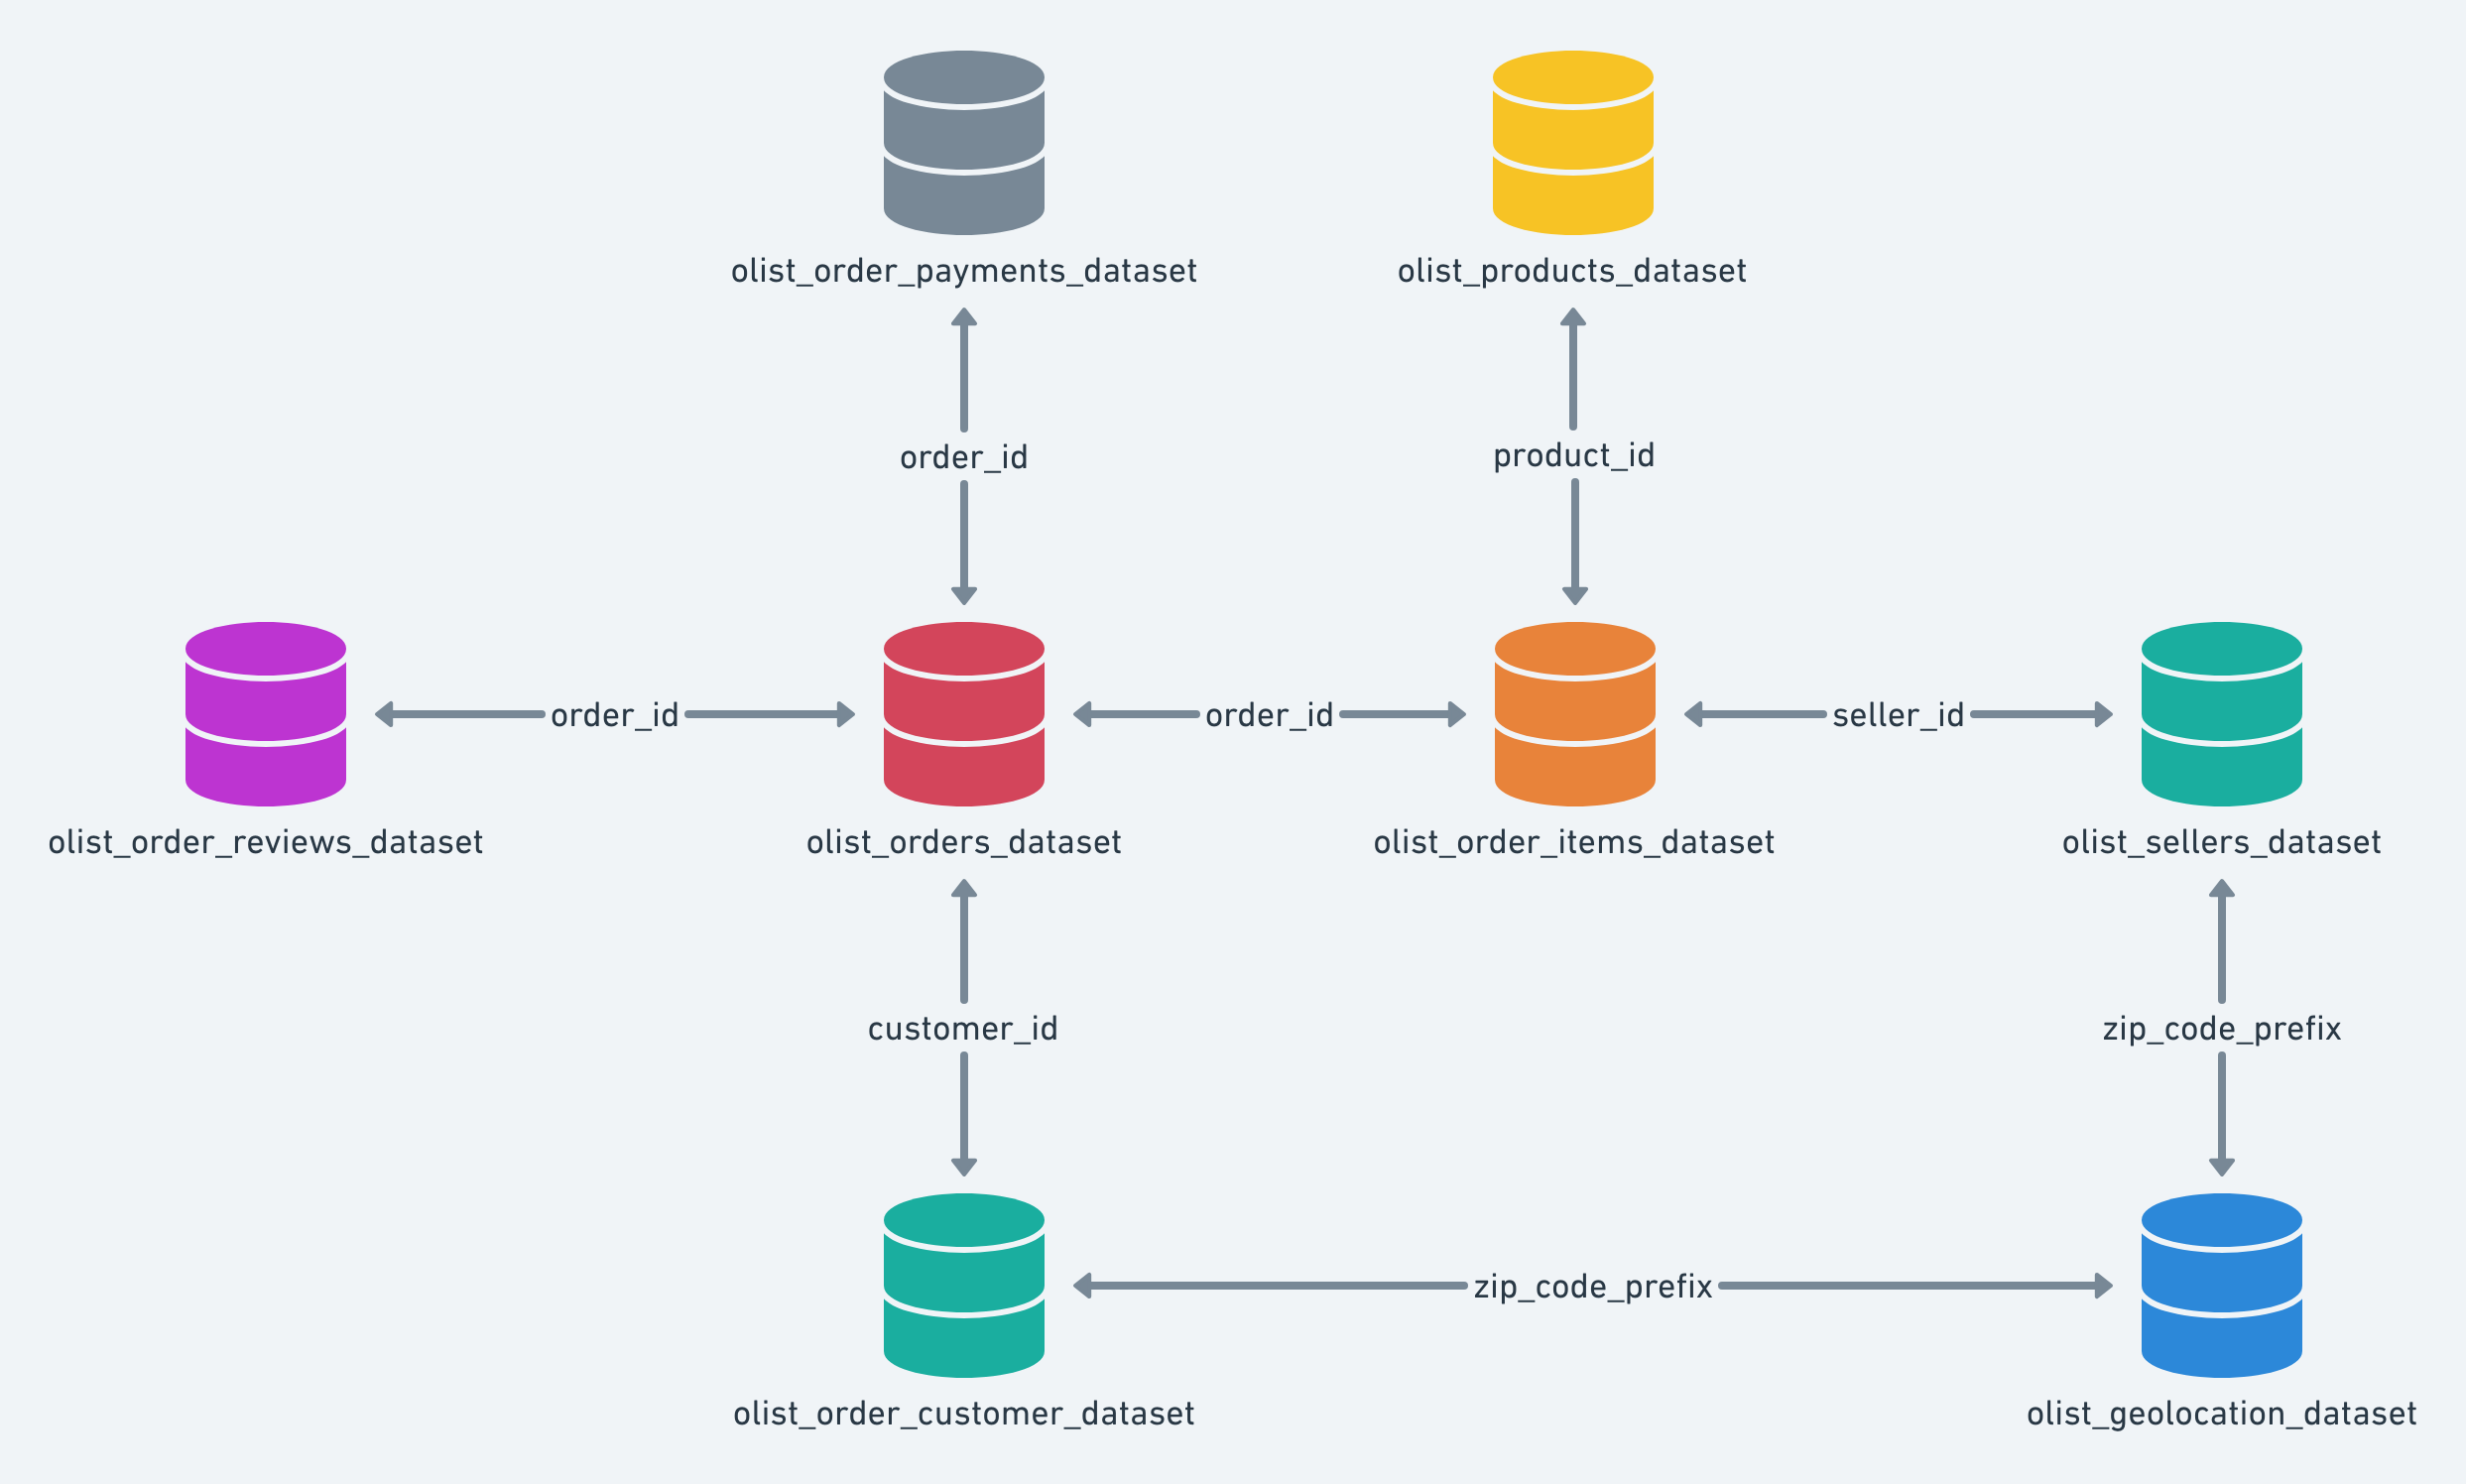

**Data Dictionary**
*  olist_orders_dataset.csv
     *  order_id : ID tiap order
     *  customer_id : ID tiap Customer
     *  order_status : Status pesanan (terkirim, terkirim, dll).
     *  order_purchase_timestamp  : Menunjukkan waktu pembelian.
     *  order_approved_at : Menunjukkan waktu persetujuan pembayaran.
     *  order_delivered_carrier_date : Menunjukkan waktu pengiriman pesanan. Saat itu ditangani ke mitra logistik.
     *  order_delivered_customer_date : Menunjukkan waktu penerimaan pesanan. Saat itu ditangani oleh pelanggan.
     *  order_estimated_delivery_date : Menunjukkan perkiraan tanggal pengiriman yang diinformasikan kepada pelanggan pada saat pembelian.
* olist_order_reviews_dataset.csv
    * review_id : ID tiap ulasan
    * order_id : ID tiap order
    * review_score :  Nilai mulai dari 1 sampai 5 yang diberikan oleh pelanggan pada survei kepuasan.
    * review_comment_title : Judul komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
    * review_comment_message :  Isi komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
    * review_creation_date : Menunjukkan tanggal pengiriman survei kepuasan kepada pelanggan.
    * review_answer_timestamp : Menampilkan Tanggal waktu jawaban survei kepuasan.
* olist_customers_dataset.csv
    * Customer_id : kunci untuk dataset pesanan. Setiap pesanan memiliki id yang unik
    * Customer_unique_id : id unik yang dimiliki customer
    * customer_zip_code_prefix : 5 digit pertama kode pos customer
    * customer_city : nama kota customer
    * customer_state : negara customer
* olist_order_payments_dataset.csv
    * order_id : id pesanan
    * payment_sequential : pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran. Jika dia melakukannya, urutan akan dibuat untuk mengakomodasi semua pembayaran.
    * payment_type : metode pembayaran
    * payment_installments : angsuran
    * payment_value : total transaksi
* olist_order_items_dataset.csv
    * order_id : id pesanan
    * order_item_id : nomor urut untuk mengidentifikasi jumlah item yang termasuk dalam pesanan yang sama.
    * product_id : id produk
    * seller_id : id penjual
    * shipping_limit_date : Menunjukkan tanggal batas pengiriman penjual untuk menangani pesanan ke mitra logistik.
    * price : harga item
    * freight_value : biaya ongkos kirim tiap satu produk
* olist_products_dataset.csv
  * product_id : ID tiap produk
  * product_name_lenght : Panjang karakter tiap nama produk
  * product_description_lenght : Panjang karakter tiap deskripsi produk
  * product_photos_qty : jumlah foto produk yang diterbitkan
  * product_weight_g : berat produk diukur dalam gram.  
  * product_length_cm : Panjang produk diukur dalam Cm.
  * product_height_cm : Tinggi produk diukur dalam Cm.
  * product_width_cm :  Lebar produk diukur dalam Cm.
* product_category_name_translation.csv
  * product_category_name : nama kategori dalam bahasa Portugis
  * product_category_name_english : nama kategori dalam bahasa Inggris
* olist_sellers_dataset.csv
  * seller_id : ID tiap penjual
  * seller_zip_code_prefix : 5 digit pertama kode pos penjual
  * seller_city : Kota penjual
  * seller_state : negara penjual
* olist_geolocation_dataset.csv
    * geolocation_zip_code_prefix : 5 digit pertama kode pos
    * geolocation_lat : garis lintang(latitude)
    * geolocation_lng : garis bujur(longitude)
    * geolocation_city : nama kota
    * geolocation_state : nama negara

In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
products_english = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')


### Gambaran Umum Data

In [3]:
#dictionary dataset
dataset_dictionary = {
    'Orders':orders, 'Order Reviews':order_reviews, 'Customer':customer,
    'Order Payments':order_payments, 'Order Items':order_items, 'Products':products,
    'Products in English':products_english, 'Sellers':sellers, 'Geolocation':geo
}
# Membuat dataframe untuk menyimpan ringkasan dataset
datasets_summary = pd.DataFrame()
datasets_summary['Dataset'] = [data[0] for data in dataset_dictionary.items()]
datasets_summary['Columns'] = [', '.join([col[0] for col in data[1].isnull().sum().items()])
                               for data in dataset_dictionary.items()]
datasets_summary['Rows'] = [data[1].shape[0] for data in dataset_dictionary.items()]
datasets_summary['Columns'] = [data[1].shape[1] for data in dataset_dictionary.items()]
datasets_summary['Duplicates'] = [data[1].duplicated().sum() for data in dataset_dictionary.items()]
datasets_summary['Nulls'] = [data[1].isnull().sum().sum() for data in dataset_dictionary.items()]
datasets_summary['Nullified Columns'] = [', '.join([col for col, null in data[1].isnull().sum().items() if null > 0])
                                         for data in dataset_dictionary.items()]
datasets_summary.set_index('Dataset')


,Columns,Rows,Duplicates,Nulls,Nullified Columns
Dataset,,,,,
Orders,8,99441,0,4908,"order_approved_at, order_delivered_carrier_dat..."
Order Reviews,7,99224,0,145903,"review_comment_title, review_comment_message"
Customer,5,99441,0,0,
Order Payments,5,103886,0,0,
Order Items,7,112650,0,0,
Products,9,32951,0,2448,"product_category_name, product_name_lenght, pr..."
Products in English,2,71,0,0,
Sellers,4,3095,0,0,
Geolocation,5,1000163,261831,0,


### Mengganti product category name ke dalam bahasa inggris

Menerjemahkan nama kategori produk ke bahasa Inggris membuat dataset lebih konsisten dan mudah dimengerti oleh pengguna, bahasa asli dataset adalah bahasa portugis. Dengan menerjemahkan nama kategori produk ke dalam bahasa Inggris, dataset menjadi lebih mudah dipahami dan digunakan oleh pengguna secara umum, sehingga meningkatkan aksesibilitas dan kegunaan data secara keseluruhan.

In [4]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
products_english

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [6]:
products = products.merge(products_english, on='product_category_name', how='left')

In [7]:
products.drop ('product_category_name', axis=1, inplace=True)

In [8]:
products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


Langkah selanjutnya adalah mengintegrasikan informasi dari beberapa sumber data yang berbeda ke dalam satu dataset yang lebih lengkap.

### Penggabungan data dalam database baru berdasarkan primary key

In [9]:
olist = orders.merge(order_items, on='order_id', how='left')
olist = olist.merge(order_payments, on='order_id', how='outer')
olist = olist.merge(order_reviews, on='order_id', how='outer')
olist = olist.merge(products, on='product_id', how='outer')
olist = olist.merge(customer, on='customer_id', how='outer')
olistfinal = olist.merge(sellers, on='seller_id', how='outer')

In [10]:
olistfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

### Data Cleaning

**Missing Value dan Duplikat Data**

In [11]:
print(olistfinal.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')


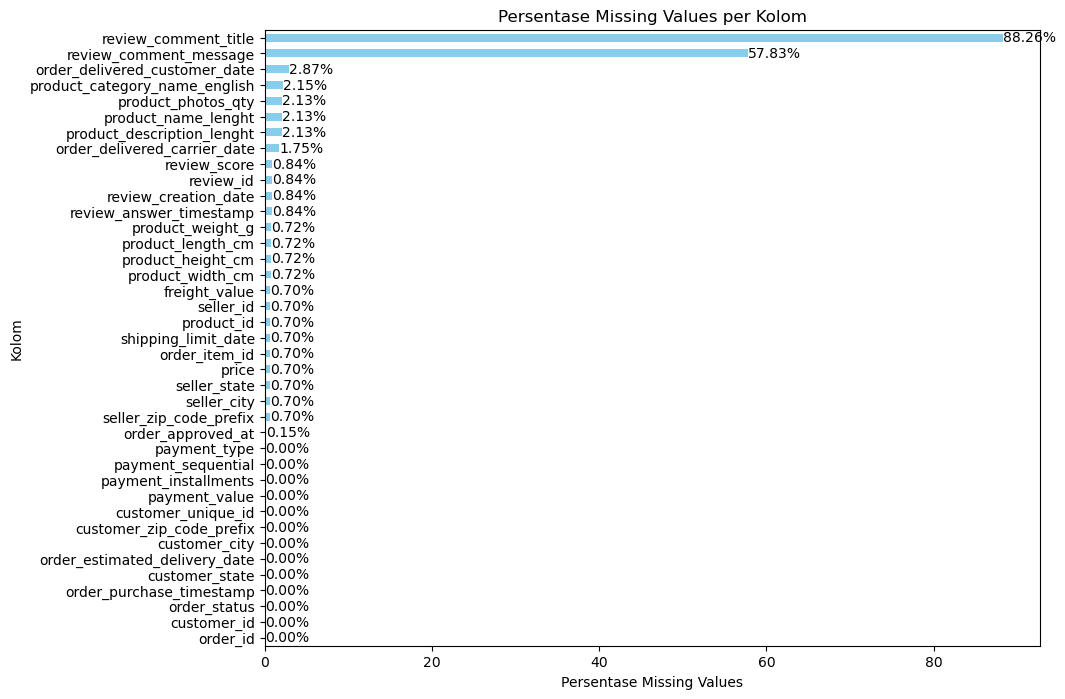

In [12]:
# Mengecek Missing Value
missing_values = olistfinal.isna().sum()
total_rows = olistfinal.shape[0]
missing_percentage = (missing_values / total_rows) * 100

missing_percentage_sorted = missing_percentage.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
missing_percentage_sorted.plot(kind='barh', color='skyblue') 
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Persentase Missing Values')
plt.ylabel('Kolom')

for index, value in enumerate(missing_percentage_sorted):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.show()


In [13]:
# review_comment_title
print("Isi kolom 'review_comment_title':")
print(olistfinal['review_comment_title'].unique())

# review_comment_message
print("\nIsi kolom 'review_comment_message':")
print(olistfinal['review_comment_message'].unique())


Isi kolom 'review_comment_title':
[nan 'Muito boa a loja' 'super recomendo' ... 'Assim que tem que ser'
 'supriu as expectativas ' 'NÃO CUMPRIU O PRAZO']

Isi kolom 'review_comment_message':
['Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.'
 'Deveriam embalar melhor o produto. A caixa veio toda amassada e vou dar de presente. '
 'Só achei ela pequena pra seis xícaras ,mais é um bom produto\r\n' ...
 '😃 ótimo 👍 '
 'Ainda não recebi meu produto, espero uma resposta de vcs, ou a devolução de um vale para fazer outra compra \r\nJá era pra ter sido entregue ontem dia 11/04/18\r\nÉ nada ainda, fico aguardando uma respost'
 'Ainda aguardo o produto. Após recebimento ou posição da empresa poderia recomendar ou modificar avaliação.']


- Kolom-kolom yang akan dilakukan penghapusan adalah yang tidak relevan untuk analisis selanjutnya. 
- Kolom 'review_comment_title', 'review_comment_message' akan dilakukan penghapusan karena memiliki lebih dari 50% missing value. Selain itu, konteks bahasanya menggunakan bahasa portugal
- Kolom  yang terkait informasi seller ('seller_zip_code_prefix', 'seller_city') juga akan dilakukan penghapusan karena fokus analisisnya adalah segmentasi  pelanggan sehingga kolom tersebut tidak memberikan insight apa apa.


In [14]:
olistfinal.drop(columns=['review_comment_title',
                 'review_comment_message',
                 'product_name_lenght',
                 'product_description_lenght',
                 'product_photos_qty',
                 'product_weight_g',
                 'product_length_cm',
                 'product_height_cm',
                 'product_width_cm',
                 'seller_zip_code_prefix',
                 'seller_city'],axis=1,inplace=True)

In [15]:
olistfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

- Pemeriksaan duplikat data didasarkan pada pemilihan kolom-kolom yang penting dalam merepresentasikan identitas tertentu dalam dataset.
- 'order_id' dan 'customer_id' adalah id uniq unik untuk pesanan dan pelanggan, sehingga duplikasi di sini bisa mengindikasikan kesalahan dalam pencatatan atau proses data.
- 'order_purchase_timestamp' dan 'order_delivered_customer_date' penting untuk analisis tren waktu dan kinerja pengiriman, sehingga duplikasi di sini mungkin mengindikasikan kesalahan dalam pencatatan waktu pesanan.
- 'payment_sequential' mengidentifikasi urutan pembayaran dalam satu pesanan, sehingga duplikasi bisa mengindikasikan kesalahan dalam pencatatan pembayaran.
- Memilih kolom-kolom ini sebagai kunci untuk memeriksa duplikasi dapat memastikan integritas data dan akurasi analisis dalam dataset.

In [16]:
# Menentukan kriteria untuk mengecek duplikasi
criteria = ['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','payment_sequential']
duplicated_rows = olistfinal[olistfinal.duplicated(criteria, keep='first')]
olistfinal[olistfinal.duplicated(criteria, keep='first')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,1.0,credit_card,2.0,279.30,8892abc02a527ef7535564ecfc0d0133,5.0,2018-08-29 00:00:00,2018-09-11 12:15:59,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,SP
76,f4d33a3db484fba77b5f1f1990fb3445,8cb1a8d155e0ab13fed232cdfdffc0cd,delivered,2018-08-18 22:34:35,2018-08-20 10:50:27,2018-08-21 14:56:00,2018-08-28 17:58:27,2018-09-06 00:00:00,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-22 10:50:27,116.90,22.75,1.0,credit_card,8.0,279.30,a1759275140b9ea289ee6408bb085e86,5.0,2018-08-29 00:00:00,2018-08-30 11:14:17,perfumery,f5985137de910a1e58ed6bc3214a4100,86165,florestopolis,PR,SP
102,c6094f6ab0c25eda761622ab09aa423d,69ee62ecc8d2937fca0e1a3d4de5a2ce,delivered,2018-07-25 10:16:15,2018-07-25 10:30:20,2018-07-26 14:31:00,2018-07-30 17:29:34,2018-08-22 00:00:00,2.0,0f91b6a95a57a43203a9b17de98960d9,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 10:30:20,119.30,15.93,1.0,credit_card,6.0,269.97,d266ab294a1fa257804bea470618c8c5,5.0,2018-07-31 00:00:00,2018-08-01 01:48:47,health_beauty,9b82602fc3e9a153752f16553752d58d,21930,rio de janeiro,RJ,SP
110,c94edffab2f10ec24645c62b40881e88,83e4193ef8adca21142f06ba078bf556,delivered,2018-08-25 14:05:07,2018-08-26 13:55:19,2018-08-27 14:36:00,2018-08-29 11:44:40,2018-09-11 00:00:00,2.0,fbc1488c1a1e72ba175f53ab29a248e8,289cdb325fb7e7f891c38608bf9e0962,2018-08-28 13:55:19,116.90,15.92,1.0,credit_card,5.0,265.64,4c9edf9090763f01b46103e2e218c926,3.0,2018-08-30 00:00:00,2018-08-30 16:53:52,perfumery,3ff9132b9f4a7e46118e5347c765f77b,23035,rio de janeiro,RJ,SP
125,a59244db9c00a55a76803349b21f244d,b82f3c3423d8ffd289353c912be332f0,delivered,2018-07-24 02:10:35,2018-07-25 02:35:15,2018-07-25 14:49:00,2018-07-30 17:50:44,2018-08-08 00:00:00,1.0,6e423c2d28bfb207e1fd1d6e1df84721,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 02:35:15,28.89,29.47,1.0,boleto,1.0,184.91,3851d957c26891c7cb23bbfb662f86d1,5.0,2018-07-31 00:00:00,2018-07-31 22:01:05,perfumery,3e332338454c5752a0ff8cb3858fabfb,13484,limeira,SP,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119115,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaN,NaN,2018-01-05 00:00:00,4.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09 00:00:00,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP
119116,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaN,NaN,2018-01-05 00:00:00,5.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09 00:00:00,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP
119120,b6b9f5144b004ad3db40567cdce34811,8fdfa85118487910ecb24477b00c6ae3,delivered,2018-04-30 10:10:48,2018-04-30 10:31:13,2018-05-07 14:04:00,2018-05-14 16:37:46,2018-05-17 00:00:00,2.0,6292e8c74db1d4defdbd8244c1101bb6,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,2018-05-07 10:31:02,23.90,18.23,1.0

In [17]:
olistfinal.iloc[119115:119117]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_state
119115,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaN,NaN,2018-01-05 00:00:00,4.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09 00:00:00,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP
119116,c894fad29c885c81201d9bdd80cd68c5,42db86d932ba029e4e0290778ebfc59d,invoiced,2017-12-18 10:39:37,2017-12-19 09:51:49,NaN,NaN,2018-01-05 00:00:00,5.0,0c40401eba358c9ef2ff2df80b6eab52,3bfad056cf05c00dabe2f895925d83b1,2017-12-26 09:51:49,41.33,9.34,1.0,boleto,1.0,253.35,a0cce310b010a5ba8531952af8d2836c,1.0,2018-01-09 00:00:00,2018-01-09 03:29:32,NaN,803c530613f5c4ee03502be0d6894de0,12236,sao jose dos campos,SP,SP


Setelah diperiksa,  15256 baris yang diidentifikasi sebagai duplikat berdasarkan kolom-kolom 'order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', dan 'payment_sequential'. Duplikat dapat menyebabkan bias dalam analisis dan menimbulkan ketidakakuratan dalam interpretasi data. Oleh karena itu, akan dilakukan penghapusan baris yang mengandung duplikat untuk memastikan keakuratan analisis yang dilakukan.

In [18]:
olistfinal.drop_duplicates(subset=['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'payment_sequential'], inplace=True)

**Formatting Datetime**

In [19]:
olistfinal['order_purchase_timestamp'] = pd.to_datetime(olistfinal.order_purchase_timestamp)
olistfinal['order_approved_at'] = pd.to_datetime(olistfinal.order_approved_at)
olistfinal['order_delivered_carrier_date'] = pd.to_datetime(olistfinal.order_delivered_carrier_date)
olistfinal['order_delivered_customer_date'] = pd.to_datetime(olistfinal.order_delivered_customer_date)
olistfinal['order_estimated_delivery_date'] = pd.to_datetime(olistfinal.order_estimated_delivery_date)
olistfinal['shipping_limit_date'] = pd.to_datetime(olistfinal.shipping_limit_date)
olistfinal['review_creation_date'] = pd.to_datetime(olistfinal.review_creation_date)

In [20]:
olistfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103887 entries, 0 to 119142
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   order_item_id                  103057 non-null  float64       
 9   product_id                     103057 non-null  object        
 10  seller_id                      103057 non-null  object        
 11  shipp

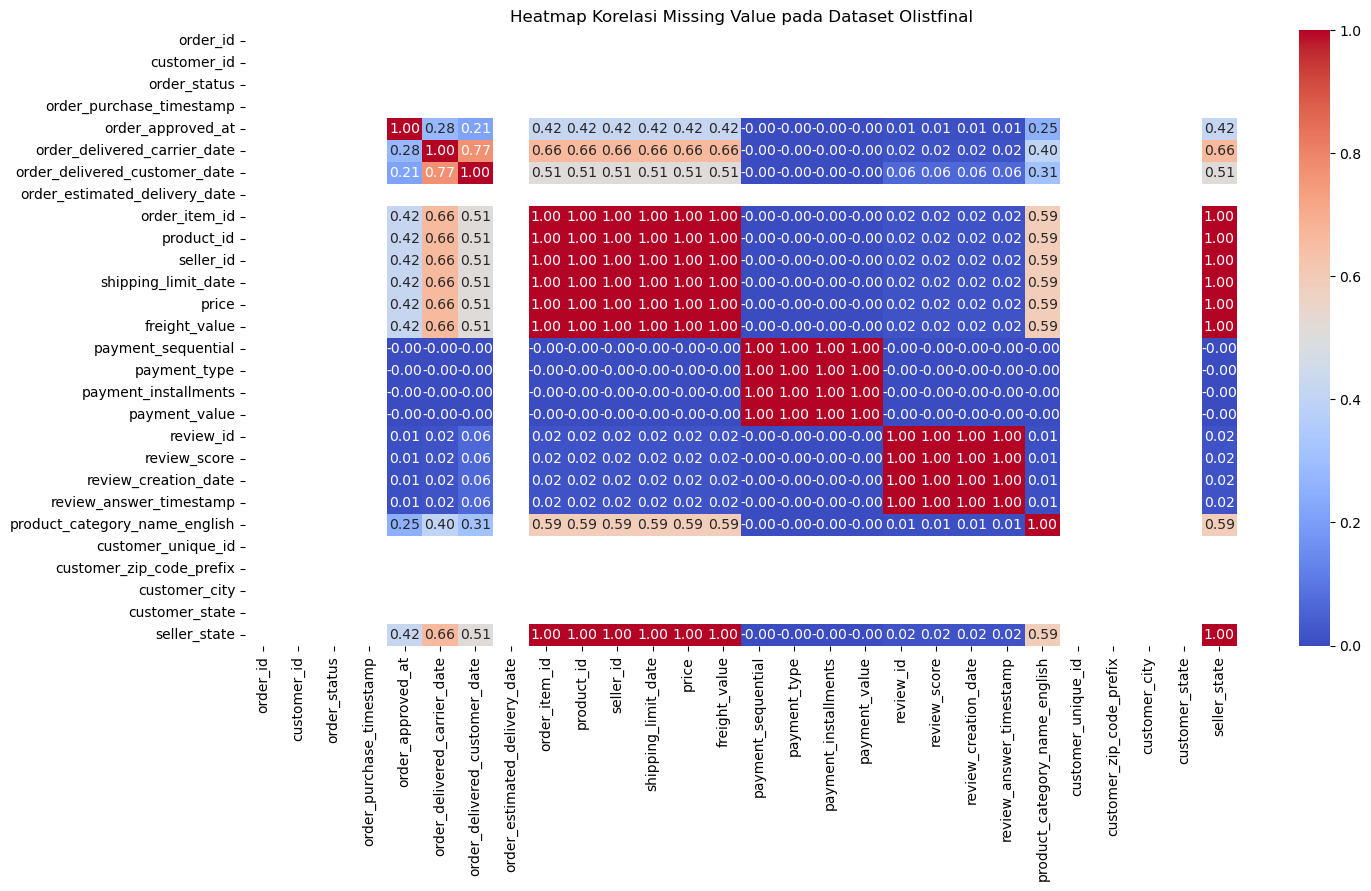

In [22]:
missing_values = olistfinal.isnull()
missing_corr = missing_values.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Missing Value pada Dataset Olistfinal')
plt.show()


## Explaratory Data Analysis (EDA)

## Methodology (Modelling/Analysis)

## Conclusion

## Recommendation